In [1]:
!pip install opencv-contrib-python==4.2.0.34

In [2]:
import cv2
import matplotlib.pyplot as plt

(100, 100, 3)


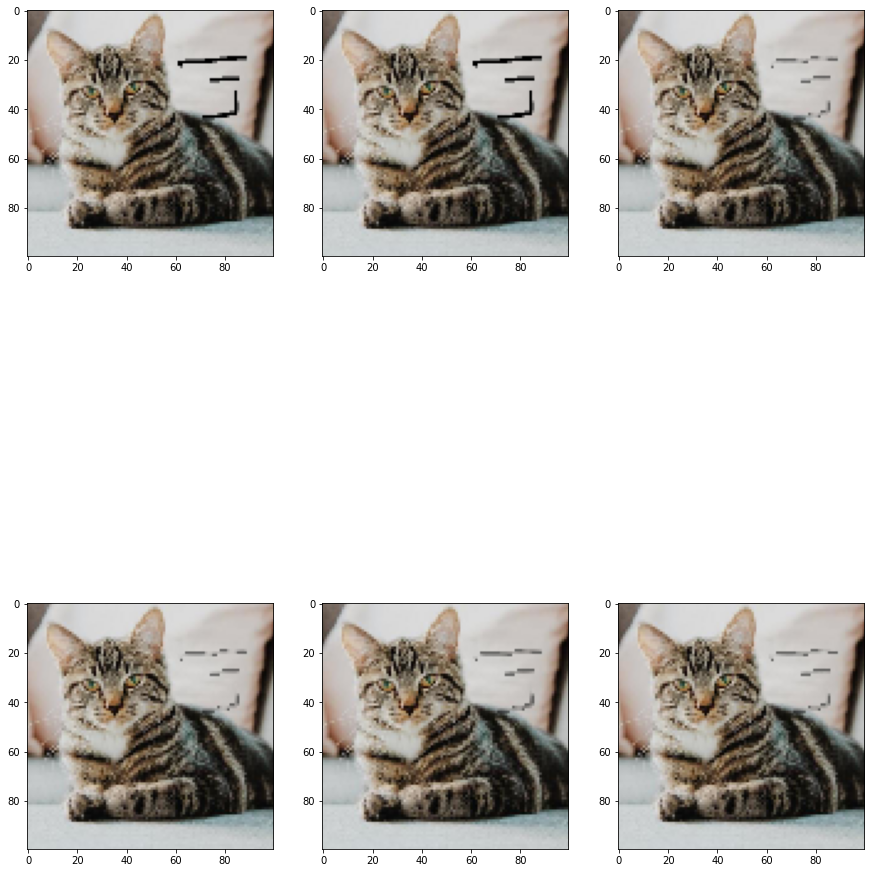

In [3]:
img = cv2.imread('/content/drive/MyDrive/Projects/ImageInpainting/cat_damaged.png')
img = cv2.resize(img, None, fx=0.25, fy=0.25)
mask = cv2.imread('/content/drive/MyDrive/Projects/ImageInpainting/cat_mask.png', 0)
print(img.shape)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))
_, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
mask1 = cv2.bitwise_not(mask)
distort = cv2.bitwise_and(img, img, mask=mask1)

output1 = cv2.inpaint(distort, mask, 3, cv2.INPAINT_NS)
output2 = cv2.inpaint(distort, mask, 3, cv2.INPAINT_TELEA)

restored1 = img.copy()
restored2 = img.copy()
cv2.xphoto.inpaint(distort, mask1, restored1, cv2.xphoto.INPAINT_FSR_FAST)
cv2.xphoto.inpaint(distort, mask1, restored2, cv2.xphoto.INPAINT_FSR_BEST)

dst3 = cv2.cvtColor(restored1, cv2.COLOR_BGR2RGB)
dst4 = cv2.cvtColor(restored2, cv2.COLOR_BGR2RGB)
dst1 = cv2.cvtColor(output1, cv2.COLOR_BGR2RGB)
dst2 = cv2.cvtColor(output2, cv2.COLOR_BGR2RGB)
dst = cv2.cvtColor(distort, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 20))
plt.subplot(2, 3, 1)
plt.imshow(img1)
plt.subplot(2, 3, 2)
plt.imshow(dst)
plt.subplot(2, 3, 3)
plt.imshow(dst1)
plt.subplot(2, 3, 4)
plt.imshow(dst2)
plt.subplot(2, 3, 5)
plt.imshow(dst3)
plt.subplot(2, 3, 6)
plt.imshow(dst4)